#Sales Trends and Performance Analysis for Business Optimization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Sales Data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/1/2013,30/1/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


#Data Cleaning and Preparation

In [12]:
# Rename columns for consistency
df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)

In [ ]:
# Convert Order Date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce',dayfirst=True)

In [ ]:
# Remove rows with invalid dates or missing values
df.dropna(subset=['order_date', 'sales', 'product_name'], inplace=True)

In [ ]:
# Make sure 'sales' is numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df.dropna(subset=['sales'], inplace=True)

In [39]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,month,weekday,repeat_buyer
6158,33526,CA-2011-128055,2011-03-31,5/4/2011,Standard Class,AA-10315,Alex Avila,Consumer,San Francisco,California,...,GBC DocuBind 200 Manual Binding Machine,673.5680,2,0.20,252.5880,54.96,Medium,2011-03,Thursday,New
36416,33527,CA-2011-128055,2011-03-31,5/4/2011,Standard Class,AA-10315,Alex Avila,Consumer,San Francisco,California,...,Fellowes Advanced Computer Series Surge Protec...,52.9800,2,0.00,14.8344,3.17,Medium,2011-03,Thursday,Returning
10821,27387,ID-2011-40953,2011-07-04,7/7/2011,First Class,AA-10315,Alex Avila,Consumer,Marikina,National Capital,...,"Fiskars Trimmer, Serrated",278.8500,13,0.45,-141.9600,30.01,High,2011-07,Monday,Returning
27138,27385,ID-2011-40953,2011-07-04,7/7/2011,First Class,AA-10315,Alex Avila,Consumer,Marikina,National Capital,...,"Avery Shipping Labels, Alphabetical",44.9295,7,0.45,-4.2105,6.91,High,2011-07,Monday,Returning
27618,27386,ID-2011-40953,2011-07-04,7/7/2011,First Class,AA-10315,Alex Avila,Consumer,Marikina,National Capital,...,"SanDisk Numeric Keypad, USB",29.2380,1,0.45,-8.5320,6.66,High,2011-07,Monday,Returning


#Total Sales Calculation

In [13]:
total_sales = df['sales'].sum()
print(f"✅ Total Sales: ₹{total_sales:,.2f}")

✅ Total Sales: ₹12,642,501.91


#Sales Trend Over Time

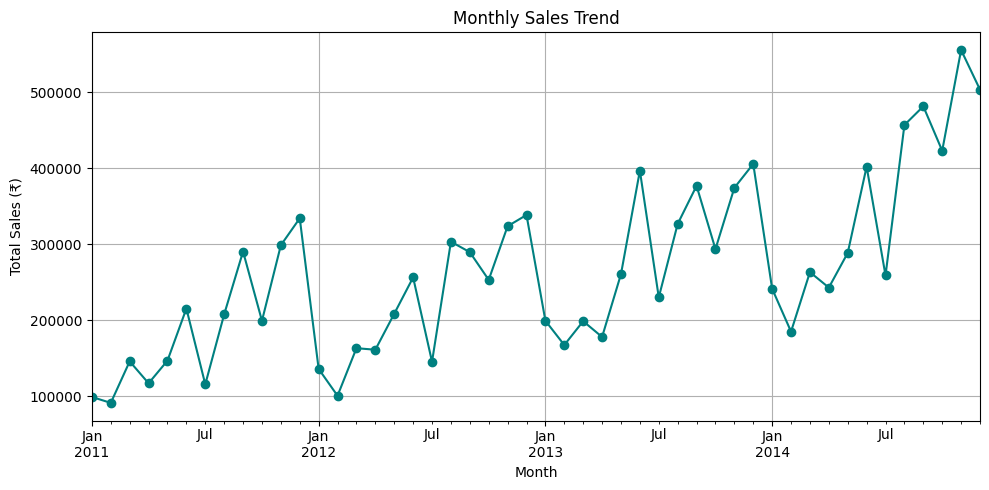

In [14]:
# Group by Month
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum()

# Plot trend
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Best-Selling Products

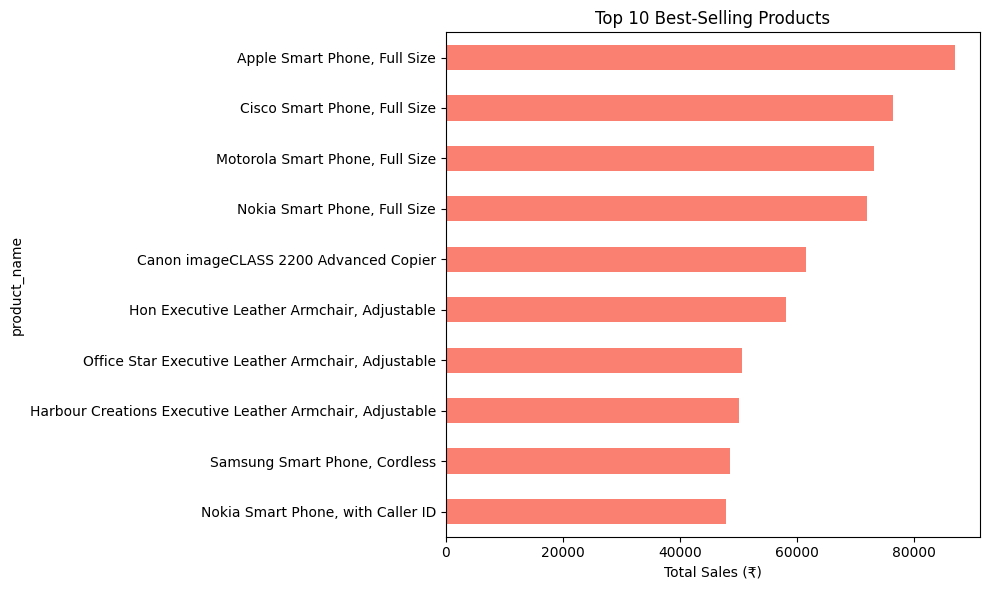

In [15]:
# Top 10 products by total sales
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='salmon')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales (₹)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Sales by Category

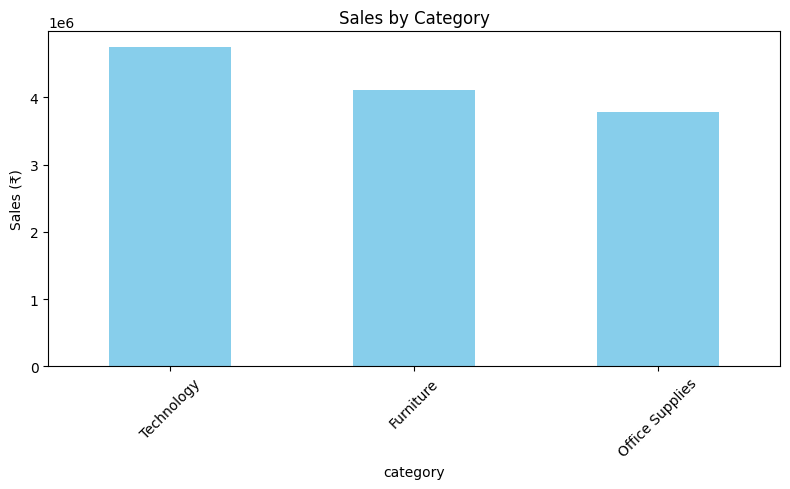

In [16]:
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Sales by  State

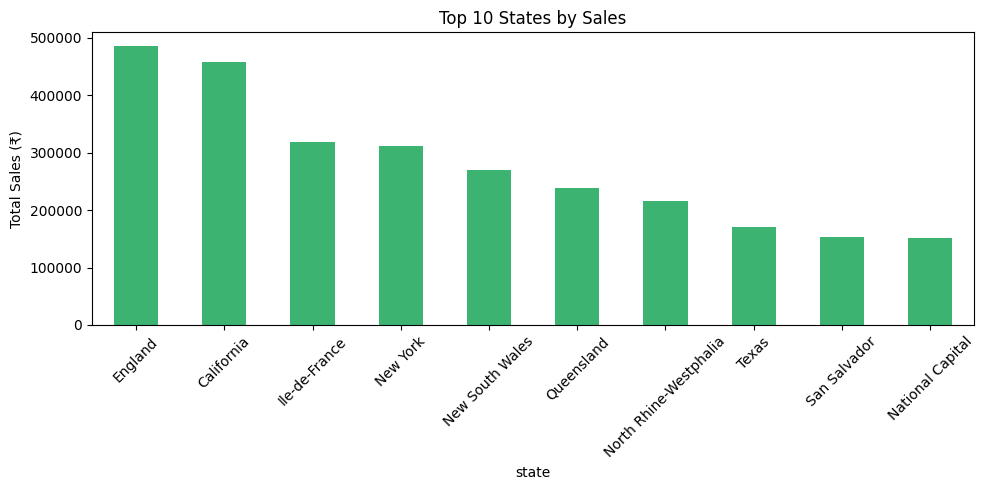

In [17]:
if 'state' in df.columns:
    state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,5))
    state_sales.plot(kind='bar', color='mediumseagreen')
    plt.title('Top 10 States by Sales')
    plt.ylabel('Total Sales (₹)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#Average Order Value

In [18]:
average_order_value = df.groupby('order_id')['sales'].sum().mean()
print(f"📦 Average Order Value: ₹{average_order_value:,.2f}")

📦 Average Order Value: ₹504.99


#Most Frequent Customers

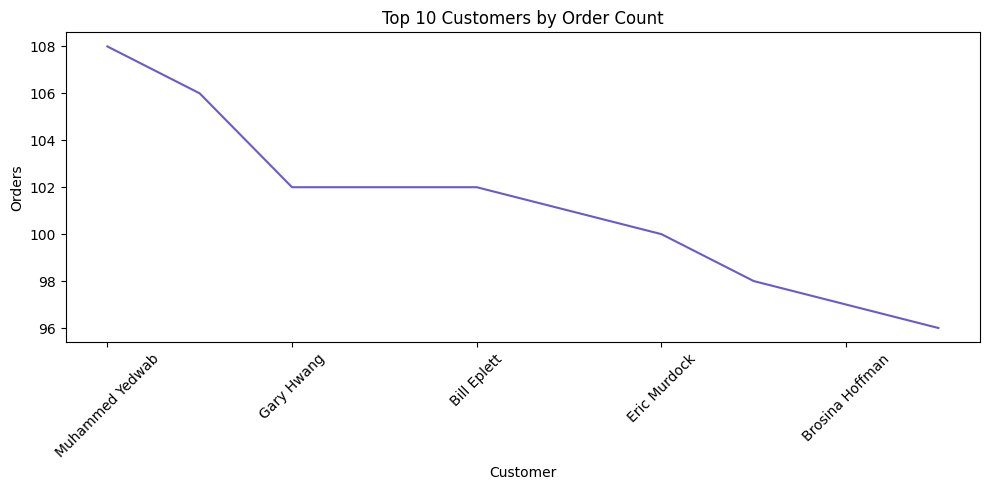

In [26]:
if 'customer_name' in df.columns:
    top_customers = df['customer_name'].value_counts().head(10)

    plt.figure(figsize=(10,5))
    top_customers.plot(kind='line', color='slateblue')
    plt.title('Top 10 Customers by Order Count')
    plt.xlabel('Customer')
    plt.ylabel('Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#Sales by Weekday

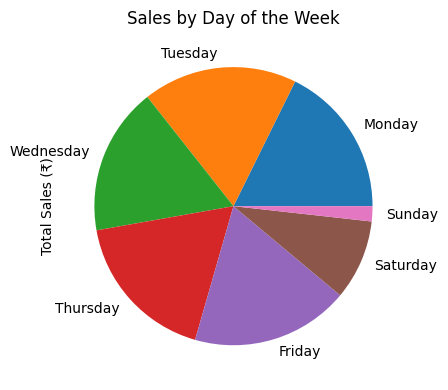

In [28]:
df['weekday'] = df['order_date'].dt.day_name()
weekday_sales = df.groupby('weekday')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8,4))
weekday_sales.plot(kind='pie', color='darkorange')
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales (₹)')
plt.tight_layout()
plt.show()

#Top Discounted Products

In [29]:
if 'discount' in df.columns:
    discount_impact = df.groupby('product_name')[['sales', 'discount']].mean().sort_values(by='discount', ascending=False).head(10)
    print(discount_impact)

                                                       sales  discount
product_name                                                          
Chromcraft Training Table, Adjustable Height         38.1440  0.800000
Eureka Disposable Bags for Sanitaire Vibra Groo...    1.6240  0.800000
GBC Plasticlear Binding Covers                        9.8400  0.728571
GBC VeloBinder Electric Binding Machine             124.0045  0.725000
Zebra GK420t Direct Thermal/Thermal Transfer Pr...  703.7100  0.700000
Epson Perfection V600 Photo Scanner                 206.9910  0.700000
Cisco 8961 IP Phone Charcoal                        224.9370  0.700000
Brother MFC-9340CDW LED All-In-One Printer, Cop...  341.9910  0.700000
Bush Westfield Collection Bookcases, Dark Cherr...   90.8820  0.700000
Lexmark MarkNet N8150 Wireless Print Server         361.7550  0.700000


# Sales by Shipping Mode

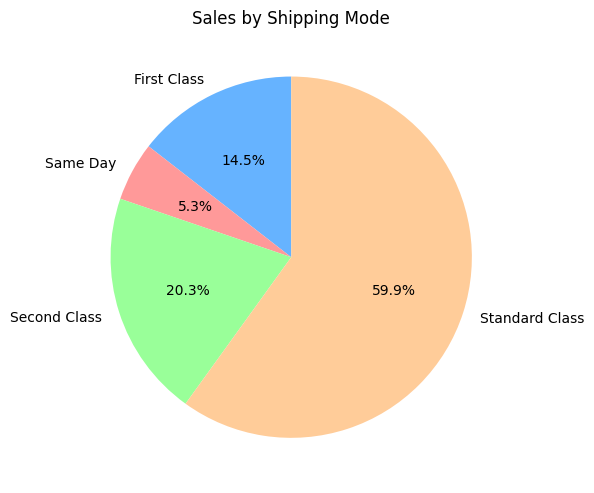

In [30]:
if 'ship_mode' in df.columns:
    ship_sales = df.groupby('ship_mode')['sales'].sum()

    ship_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
    plt.title('Sales by Shipping Mode')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

#Returning Customers vs New

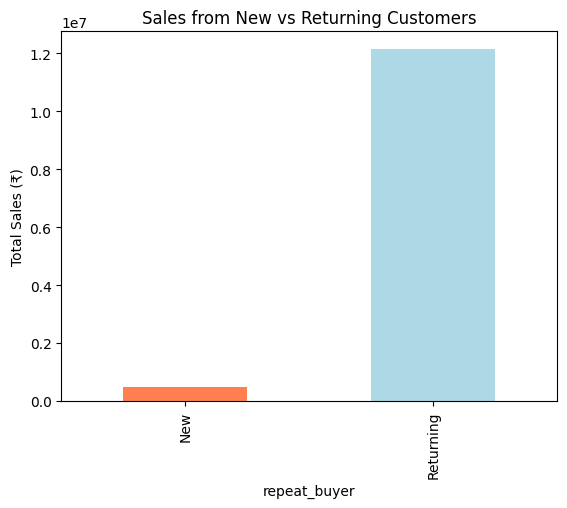

In [31]:
df.sort_values(['customer_id', 'order_date'], inplace=True)
df['repeat_buyer'] = df.duplicated(subset='customer_id', keep='first').map({True: 'Returning', False: 'New'})
repeat_sales = df.groupby('repeat_buyer')['sales'].sum()
repeat_sales.plot(kind='bar', color=['coral', 'lightblue'])
plt.title('Sales from New vs Returning Customers')
plt.ylabel('Total Sales (₹)')
plt.show()

#Order Volume Distribution

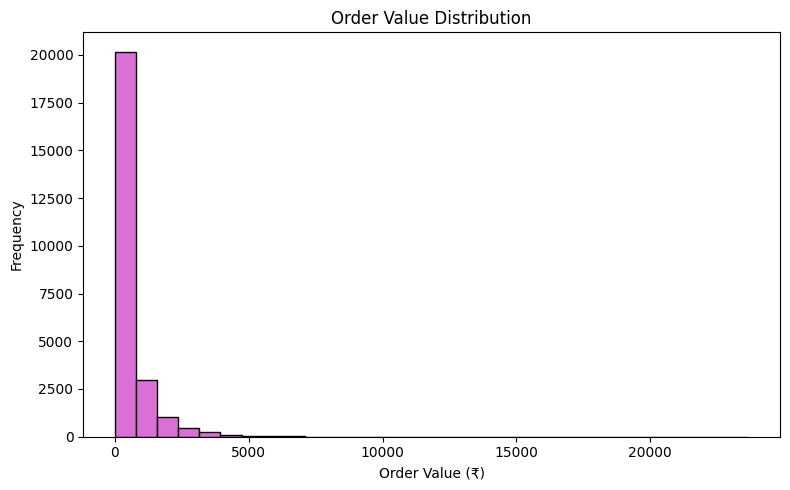

In [38]:
order_sizes = df.groupby('order_id')['sales'].sum()
plt.figure(figsize=(8,5))
plt.hist(order_sizes, bins=30, color='orchid', edgecolor='black')
plt.title('Order Value Distribution')
plt.xlabel('Order Value (₹)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()